In [1]:
import torchvision.transforms as transforms
import torchvision.models as models
import torch
import timm
model_names = timm.list_models(pretrained=True)


/home/laboni-nasib/anaconda3/envs/xc/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_names

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_rw_224',
 'coatnet_1_rw_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_rw_224',
 'coatnet_rmlp_1_rw_224',
 'coatnet_rmlp_2_rw_224',
 'coatnet_rmlp_nano_rw_224',
 'coatnext_nano_rw_224',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_atto',
 'convnext_atto_

In [3]:

data_transform_vit = transforms.Compose([transforms.ToPILImage(),transforms.Resize((224,224)),
                                     transforms.ToTensor()])

m = timm.create_model('deit3_base_patch16_224', pretrained=True)
m.reset_classifier(0, '')
m(torch.rand(10,3,224,224)).shape

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_3_base_224_1k.pth" to /home/laboni-nasib/.cache/torch/hub/checkpoints/deit_3_base_224_1k.pth


torch.Size([10, 197, 768])

In [1]:
import os

root_path = '/media/laboni-nasib/Nasib/Dropbox/Anaconda_Workspace/Datasets'

from config import PathMMAmazonTitles300K, ConfigImageOnly
from dataset import DataHandler

cfg = ConfigImageOnly(root_path,'mmamazontitles300k')
path = PathMMAmazonTitles300K(root_path)

/home/laboni-nasib/anaconda3/envs/xc/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_handler = DataHandler(cfg,path)

In [3]:
import pickle5 as pickle
f = open(path.test_img_file,'rb')
test_img_dict = pickle.load(f) 

In [12]:
import random
test_uid = list(data_handler.test_text_dict.keys())

In [15]:
#data_handler.test_label_dict[test_uid[0]]

In [13]:
random.choice(test_img_dict[test_uid[0]])

"/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCACAAIADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2CWY+WojzmQgBj0GaiEMqAg3KZPcp/wDXqlDqDvdw2zx4DMrI2Pzq/coWYEhSo6gjNcclCqvaWuWuxkS+FzNMZm1KVnOedgxVG40O10+9iub3WZTJneokQ4IX/d7c1sXCXEO37JA5TOSN2ADnj/GqHidDLf6fCGRXl+RSwyM

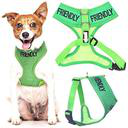

In [19]:
from PIL import Image
import io, base64
from io import BytesIO
id = 3
img = Image.open(io.BytesIO(base64.decodebytes(bytes(test_img_dict[test_uid[id]][0], "utf-8"))))
img

In [21]:
import torchvision.transforms as transforms
data_transform_vit = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor()])

data_transform_vit(img).shape

torch.Size([3, 224, 224])

In [ ]:
data_handler.train_text_dict[train_uid[id]] 

In [ ]:
labels = data_handler.train_label_dict[train_uid[id]]
for label in labels:
    print(data_handler.label_text_dict[data_handler.label2uid_dict[label]])

In [6]:
train_img_count = []
for id in test_uid:
    train_img_count.append(len(test_img_dict[id]))

In [9]:
max(train_img_count)

50

In [ ]:
# cluster from AttentionXML

import os
import tqdm
import joblib
import numpy as np
from scipy.sparse import csr_matrix, csc_matrix
from sklearn.preprocessing import normalize
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import MultiLabelBinarizer

def get_sparse_feature(feature_file, label_file):
    sparse_x, _ = load_svmlight_file(feature_file, multilabel=True)
    sparse_labels = [i.replace('\n', '').split() for i in open(label_file)]
    return normalize(sparse_x), np.array(sparse_labels)

def build_tree_by_level(sparse_data_x, sparse_data_y, eps: float, max_leaf: int, levels: list, groups_path):
    print('Clustering')
    sparse_x, sparse_labels = get_sparse_feature(sparse_data_x, sparse_data_y)
    mlb = MultiLabelBinarizer(sparse_output=True)
    sparse_y = mlb.fit_transform(sparse_labels)
    joblib.dump(mlb, groups_path+'mlb')
    print('Getting Labels Feature')
    labels_f = normalize(csr_matrix(sparse_y.T) @ csc_matrix(sparse_x))
    print(F'Start Clustering {levels}')
    levels, q = [2**x for x in levels], None
    for i in range(len(levels)-1, -1, -1):
        if os.path.exists(F'{groups_path}-Level-{i}.npy'):
            print(F'{groups_path}-Level-{i}.npy')
            labels_list = np.load(F'{groups_path}-Level-{i}.npy', allow_pickle=True)
            q = [(labels_i, labels_f[labels_i]) for labels_i in labels_list]
            break
    if q is None:
        q = [(np.arange(labels_f.shape[0]), labels_f)]
    while q:
        labels_list = np.asarray([x[0] for x in q])
        assert sum(len(labels) for labels in labels_list) == labels_f.shape[0]
        if len(labels_list) in levels:
            level = levels.index(len(labels_list))
            print(F'Finish Clustering Level-{level}')
            np.save(F'{groups_path}-Level-{level}.npy', np.asarray(labels_list))
        else:
            print(F'Finish Clustering {len(labels_list)}')
        next_q = []
        for node_i, node_f in q:
            if len(node_i) > max_leaf:
                next_q += list(split_node(node_i, node_f, eps))
            else:
                np.save(F'{groups_path}-last.npy', np.asarray(labels_list))
        q = next_q
    print('Finish Clustering')
    return mlb


def split_node(labels_i: np.ndarray, labels_f: csr_matrix, eps: float):
    n = len(labels_i)
    c1, c2 = np.random.choice(np.arange(n), 2, replace=False)
    centers, old_dis, new_dis = labels_f[[c1, c2]].toarray(), -10000.0, -1.0
    l_labels_i, r_labels_i = None, None
    while new_dis - old_dis >= eps:
        dis = labels_f @ centers.T  # N, 2
        partition = np.argsort(dis[:, 1] - dis[:, 0])
        l_labels_i, r_labels_i = partition[:n//2], partition[n//2:]
        old_dis, new_dis = new_dis, (dis[l_labels_i, 0].sum() + dis[r_labels_i, 1].sum()) / n
        centers = normalize(np.asarray([np.squeeze(np.asarray(labels_f[l_labels_i].sum(axis=0))),
                                        np.squeeze(np.asarray(labels_f[r_labels_i].sum(axis=0)))]))
    return (labels_i[l_labels_i], labels_f[l_labels_i]), (labels_i[r_labels_i], labels_f[r_labels_i])

In [ ]:
class Config:
    def __init__(self,dataset=None,tree=None,ide=0):
        self.dataset = dataset
        self.tre = tree
        self.id  = ide
        
args = Config('amazontitles300k')

dataset = args.dataset
if dataset == 'amazon670k':
    mlb = build_tree_by_level('/scratch/project_2001083/nasib/Datasets/Amazon-670K/train_v1.txt', 
                              '/scratch/project_2001083/nasib/Datasets/Amazon-670K/train_labels.txt',
                              1e-4, 100, [], '/scratch/project_2001083/nasib/XMC/LightXML/data/Amazon-670K/label_group'+str(args.id))
    groups = np.load(f'/scratch/project_2001083/nasib/XMC/LightXML/data/Amazon-670K/label_group{args.id}-last.npy', allow_pickle=True)
    new_group = []
    for group in groups:
        new_group.append([mlb.classes_[i] for i in group])
    np.save(f'/scratch/project_2001083/nasib/XMC/LightXML/data/Amazon-670K/label_group{args.id}.npy', np.array(new_group))
if dataset == 'wiki500k':
    mlb = build_tree_by_level('./data/Wiki-500K/train.txt', 
                              './data/Wiki-500K/train_labels.txt',
                              1e-4, 100, [], './data/Wiki-500K/groups')
    groups = np.load(f'./data/Wiki-500K/groups-last{args.id}.npy', allow_pickle=True)
    new_group = []
    for group in groups:
        new_group.append([mlb.classes_[i] for i in group])
    np.save(f'./data/Wiki-500K/label_group{args.id}.npy', np.array(new_group))
    
if dataset == 'amazontitles300k':
    mlb = build_tree_by_level('/scratch/project_2001083/nasib/Datasets/AmazonTitles-300K/train.txt', 
                              '/scratch/project_2001083/nasib/Datasets/AmazonTitles-300K/train_labels.txt',
                              1e-4, 100, [], '/scratch/project_2001083/nasib/XMC/LightXML/data/AmazonTitles-300K/label_group'+str(args.id))
    groups = np.load(f'/scratch/project_2001083/nasib/XMC/LightXML/data/AmazonTitles-300K/label_group{args.id}-last.npy', allow_pickle=True)
    new_group = []
    for group in groups:
        new_group.append([mlb.classes_[i] for i in group])
    np.save(f'/scratch/project_2001083/nasib/XMC/LightXML/data/AmazonTitles-300K/label_group{args.id}.npy', np.array(new_group))


In [ ]:
!nvidia-smi